Solution to Hw2 part 1:

1) the linear charge density:

In [1]:
import numpy,scipy

dim = dimensions of x&y plane to explore the potential, points = number of points in one dimension of the grid

In [2]:
dim=5
points=40

In [3]:
xgrid=numpy.linspace(-dim,dim,points)
ygrid=numpy.linspace(-dim,dim,points)
zgrid=numpy.linspace(-dim,dim,points)

this is the integrand for the  linear charge density:

In [4]:
f = lambda a,b,c,x: 2*x/numpy.sqrt((a-x)**2+b**2+c**2)

In [5]:
import scipy.integrate as sci
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
V=numpy.zeros((len(xgrid),len(ygrid)))
for i in range(points):
        a=xgrid[i]
        for j in range(points):
            b=ygrid[j]
           # for k in range(points):
           #     c=zgrid[k]
            g= lambda x: f(a,b,0,x)
            vabc=sci.quad(g,0,1)[0]
            V[i][j]=vabc

In [7]:
#Vxy=numpy.zeros((len(xgrid),len(ygrid)))
#Vxy[i][j]=V[i][j][0]

#for i in range (points):
#    for j in range(points):
#        Vxy[i][j]=V[i][j][0]

Text(0.5,0.92,'linear charge potential in xy plane')

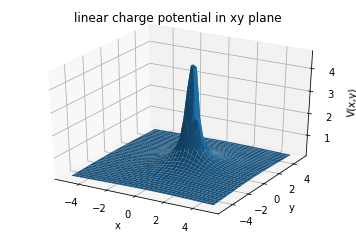

In [8]:
X,Y=numpy.meshgrid(xgrid,ygrid,indexing='ij')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, V)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')
ax.set_title('linear charge potential in xy plane')



This is the potenial in xy plane for the linear charge density, and it should be the same plot for all planes passing 
through the x axis as the charge distribution is symmetric around the x axis

Now we calculate the electric field in the xy plane with contours of the electric potential:

In [9]:
[Ex,Ey]=numpy.gradient(-V)
#V1=numpy.zeros(len(xgrid))
#V2=numpy.zeros(len(ygrid))
#Ex=-numpy.diff(V)/numpy.diff(xgrid)
#Ey=-numpy.diff(V)/numpy.diff(ygrid)
E=numpy.sqrt(Ex**2+Ey**2)
Exn=Ex/E
Eyn=Ey/E

In [10]:
#h=2*dim/points
#Ex=[]
#Ey=[]
#Ez=[] 
#for i in range(points-1):
 #   for j in range(points-1):
       # for k in range(points-1):
  #      Ex.append(-(V[i+1][j]-V[i][j])/h)
  #      Ey.append(-(V[i][j+1]-V[i][j])/h)
        #   Ez.append(-(V[i][j][k+1]-V[i][j][k])/h)

Text(0.5,1,'Electric Potential contours and Electric Field of the linear charge in xy plane')

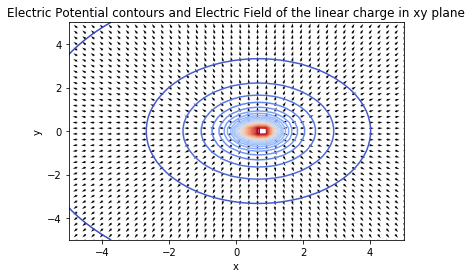

In [11]:
fig, ax = plt.subplots()
plt.contour(X,Y,V,30,cmap='coolwarm')
plt.xlabel('x')
plt.ylabel('y')
q = ax.quiver(X, Y, Exn, Eyn)
plt.title('Electric Potential contours and Electric Field of the linear charge in xy plane')

In [12]:
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.quiver(X,Y,Z,Ex,Ey,Ez)

2) Now we turn to the second charge distribution: L shaped

In [13]:
f1= lambda a,b,c,x: x**2/numpy.sqrt((a-x)**2+b**2+c**2)

In [14]:
f2= lambda a,b,c,y: y/numpy.sqrt(a**2+(b-y)**2+c**2)

In [15]:
V=numpy.zeros((len(xgrid),len(ygrid)))
for i in range(points):
        a=xgrid[i]
        for j in range(points):
            b=ygrid[j]
           # for k in range(points):
           #     c=zgrid[k]
            g1= lambda x: f1(a,b,0,x)
            g2= lambda y: f2(a,b,0,y)
            vabc=sci.quad(g1,0,1)[0]+sci.quad(g2,1,2)[0]
            V[i][j]=vabc

Text(0.5,0.92,'L configuration potential in xy plane')

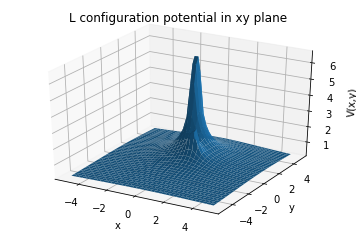

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y, V)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')
ax.set_title('L configuration potential in xy plane')

Text(0.5,1,'Electric Potential contours and Electric Field of L distribution in xy plane')

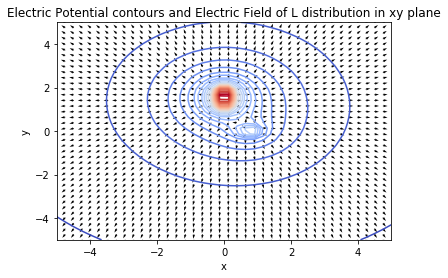

In [17]:
[Ex,Ey]=numpy.gradient(-V)
E=numpy.sqrt(Ex**2+Ey**2)
Exn=Ex/E
Eyn=Ey/E

fig, ax = plt.subplots()
plt.contour(X,Y,V,30,cmap='coolwarm')
plt.xlabel('x')
plt.ylabel('y')
q = ax.quiver(X, Y, Exn, Eyn)
plt.title('Electric Potential contours and Electric Field of L distribution in xy plane')

3) For the disk charge distribution :

In [18]:
points=12
xgrid=numpy.linspace(-dim,dim,points)
ygrid=numpy.linspace(-dim,dim,points)
zgrid=numpy.linspace(-dim,dim,points)
X,Y=numpy.meshgrid(xgrid,ygrid,indexing='ij')

In [19]:
f= lambda a,b,c,x,y: x/numpy.sqrt((a-x)**2+(b-y)**2+c**2)

In [20]:
V=numpy.zeros((len(xgrid),len(ygrid)))
for i in range(points):
        a=xgrid[i]
        for j in range(points):
            b=ygrid[j]
           # for k in range(points):
           #     c=zgrid[k]
            g1= lambda x,y: f(a,b,0,x,y)
            vabc=sci.dblquad(g1,-2,2,lambda x:-numpy.sqrt(4-x**2),lambda x:numpy.sqrt(4-x**2))[0]
            V[i][j]=vabc

Text(0.5,0.92,'Disc potential in xy plane')

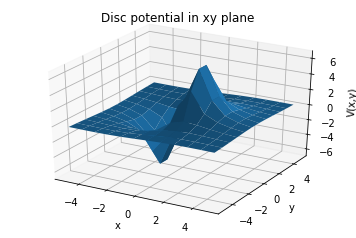

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y, V)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')
ax.set_title('Disc potential in xy plane')

Text(0.5,1,'Electric Potential contours and Electric Field of the charged disc in xy plane')

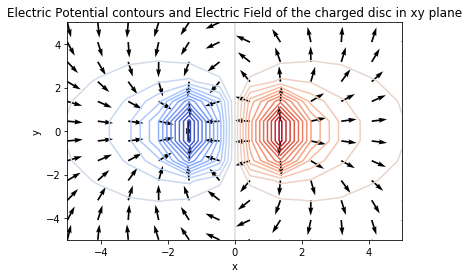

In [22]:
[Ex,Ey]=numpy.gradient(-V)
E=numpy.sqrt(Ex**2+Ey**2)
Exn=Ex/E
Eyn=Ey/E

fig, ax = plt.subplots()
plt.contour(X,Y,V,30,cmap='coolwarm')
plt.xlabel('x')
plt.ylabel('y')
q = ax.quiver(X, Y, Exn, Eyn)
plt.title('Electric Potential contours and Electric Field of the charged disc in xy plane')